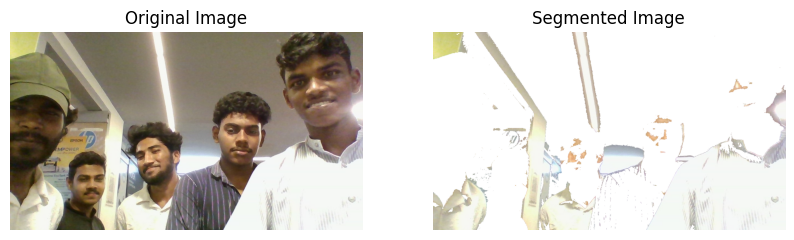

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load image
img = cv2.imread("abk.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten image to (pixels, 3)
pixels = img_rgb.reshape(-1, 3)

# Apply K-Means (2 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(pixels)

# Choose which cluster to mask (e.g., cluster 0)
mask_color = np.array([255, 255, 255])
masked_pixels = np.where(labels[:, None] == 0, mask_color, pixels)

# Reshape back to image
segmented_img = masked_pixels.reshape(img_rgb.shape)

# Display original and segmented images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_img.astype(np.uint8))
plt.title("Segmented Image")
plt.axis("off")

plt.show()